In [1]:
import tensorflow as tf
import os
import numpy as np

In [2]:
dataset = r"G:/breast_cancer"

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [4]:
train_gen = train_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset='training'
) 

validation_gen = validation_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 6342 images belonging to 2 classes.
Found 1584 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from glob import glob

In [6]:
resnet = ResNet50(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights='imagenet',
    include_top=False
)
resnet.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [7]:
for layer in resnet.layers:
    layer.trainable=False

In [9]:
x = Flatten()(resnet.output)
prediction = Dense(2, activation = 'softmax')(x)
model=Model(inputs = resnet.input, outputs = prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epoch = 20

history = model.fit(train_gen,
                    steps_per_epoch = len(train_gen),
                    epochs = epoch,
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen)
                   )

Epoch 1/20
199/199 [==============================] - 504s 3s/step - loss: 0.8125 - accuracy: 0.6498 - val_loss: 0.6862 - val_accuracy: 0.6711
Epoch 2/20
199/199 [==============================] - 450s 2s/step - loss: 0.6999 - accuracy: 0.6559 - val_loss: 0.9813 - val_accuracy: 0.3699
Epoch 3/20
199/199 [==============================] - 533s 3s/step - loss: 0.6296 - accuracy: 0.6779 - val_loss: 0.7081 - val_accuracy: 0.5934
Epoch 4/20
199/199 [==============================] - 522s 3s/step - loss: 0.5914 - accuracy: 0.6928 - val_loss: 0.6662 - val_accuracy: 0.6244
Epoch 5/20
199/199 [==============================] - 513s 3s/step - loss: 0.5617 - accuracy: 0.7189 - val_loss: 0.8769 - val_accuracy: 0.4577
Epoch 6/20
199/199 [==============================] - 565s 3s/step - loss: 0.5921 - accuracy: 0.7015 - val_loss: 0.7217 - val_accuracy: 0.6490
Epoch 7/20
199/199 [==============================] - 472s 2s/step - loss: 0.5665 - accuracy: 0.7193 - val_loss: 0.8814 - val_accuracy: 0.5177

In [12]:
score = model.evaluate(validation_gen)

50/50 [==============================] - 109s 2s/step - loss: 0.6499 - accuracy: 0.6635


In [13]:
score

[0.6499366164207458, 0.6635100841522217]

In [14]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 199}

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
import matplotlib.pyplot as plt

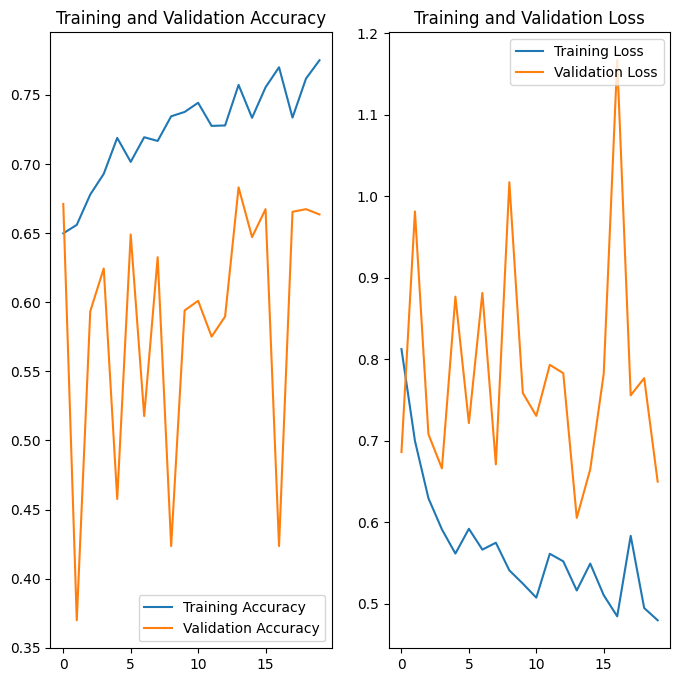

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model_version = "bc_hp_resnet50"
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/bc_hp_resnet50\assets
